In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv("univariate_regression_data.csv")
data


,Feature,Target
0,7.948113,45.274387
1,5.026371,26.716516
2,5.769039,32.732833
3,4.925177,29.175153
4,1.952430,10.908288
...,...,...
95,7.378969,42.845558
96,5.543541,32.433022
97,6.117207,33.266160
98,4.196001,23.941971


In [146]:
# Creating w and b and x
X = data["Feature"].values
Y = data["Target"].values
w = 0
b = 0
m = X.shape[0]

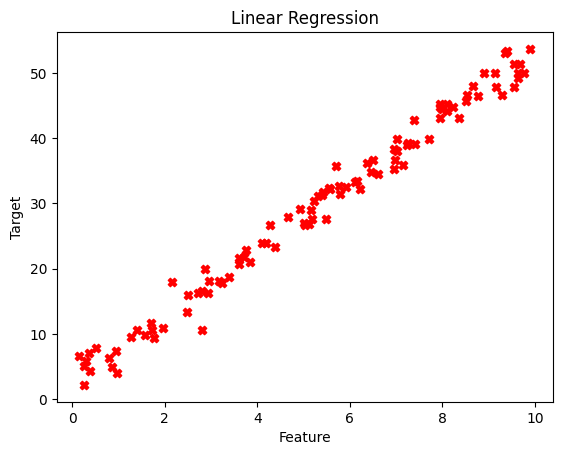

In [147]:
plt.scatter(data["Feature"],data["Target"],c='red',marker="X")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.show()

In [148]:
def cost_func(w,X,Y,b,m):
    sumerr = 0
    for i in range(m):
        t_err = ((w*X[i]+b)- Y[i])**2
        sumerr = sumerr + t_err
    mse = (sumerr)/(2*m)
    return mse

In [149]:
def Der_gradient(w,b,X,Y,m):
#This function is going to find the derivative for the gradient descent
    dj_db = 0
    dj_dw = 0
    for i in range(m):
        t1_err = ((w*X[i]+b)- Y[i])
        t2_err = ((w*X[i]+b)- Y[i])*X[i]
        dj_db  = dj_db + t1_err
        dj_dw  = dj_dw + t2_err
        
    dj_db /= m
    dj_dw /= m
    return dj_db,dj_dw
        
    

In [150]:
def gradient_descent(w,b,X,Y,n_iteration,alpha):
    m = X.shape[0]
    for i in range(n_iteration):
        dj_db , dj_dw = Der_gradient(w,b,X,Y,m)
        w = w - (alpha*dj_dw)
        b = b - (alpha*dj_db)
        if i % 100 == 0:
            mse = cost_func(w,X,Y,b,m)
            print(f"COST {mse}")
    return w,b
    
    

In [151]:
def predict(w, x_in, b, X, Y):
    y_hat = w * x_in + b
    return y_hat

COST 500.7036306852367
COST 2.271044283472785
COST 1.9818570982568022
COST 1.9646670679382239
COST 1.948365487290097
COST 1.9327725652005965
COST 1.9178574215072652
COST 1.9035905951395038
COST 1.8899439056544285
COST 1.8768903975299491
COST 1.8644042869210637
COST 1.8524609107304895
COST 1.841036677893078
COST 1.8301090227777375
COST 1.8196563606148295
COST 1.8096580448610269
COST 1.8000943264173634
COST 1.790946314619989
COST 1.78219593992652
COST 1.7738259182243103
COST 1.7658197166901308
COST 1.7581615211338488
COST 1.7508362047615451
COST 1.743829298296442
COST 1.7371269613985671
COST 1.730715955326722
COST 1.7245836167887618
COST 1.7187178329285198
COST 1.7131070173999752
COST 1.7077400874814097
COST 1.7026064421843525
COST 1.6976959413140416
COST 1.6929988854400906
COST 1.6885059967377571
COST 1.68420840066199
COST 1.680097608418048
COST 1.67616550019407
COST 1.6724043091224812
COST 1.6688066059385394
COST 1.6653652843057447
COST 1.6620735467790901
COST 1.6589248913784653
COST 1

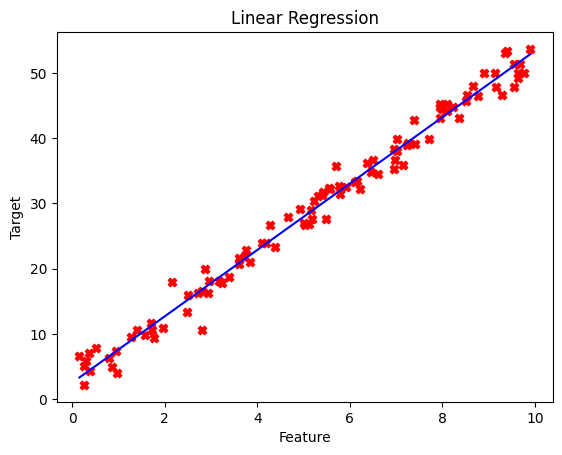

In [153]:
w, b = gradient_descent(w, b, X, Y, 10000, 0.001)
x_line = np.linspace(X.min(),X.max(),100)
y_line = w * x_line + b
plt.scatter(data["Feature"],data["Target"],c='red',marker="X")
plt.plot(x_line,y_line,c='blue')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.show()

In [154]:
x_in = int(input("Enter the x value to predict for: "))
val = predict(w,x_in,b,X,Y)


In [155]:
print(f"The predicted output is {val}")

The predicted output is 7.60604000532213
